### Transformata Hougha w przestrzeni ab - Domowe
Przestrzeń ρ,θ nie jest jedyną przestrzenią w której punkt odpowiada parametrom prostej. Np. można spróbować wykorzystać tradycyjne równanie prostej:

y=ax+b

W tej przestrzeni reprezentacją pęku prostych jest prosta. 

Zadanie: napisać funkcję, która jako argument przyjmuje obraz (binarny) oraz parametry:

- aMin - minimalna wartość parametru a
- aMax - maksymalna  wartość parametru a
- aSkok - skok parametru a
- bMin - minimalna wartość parametru b
- bMax  - maksymalna  wartość parametru b
- bSkok - skok parametru b
Jako wynik ma zwrócić macierz przestrzeni Hougha ab.

Uwagi:

- zadanie może wyglądać na skomplikowane ale tak na prawdę wymaga tylko starannego przemyślenia
- najważniejszy jest problem "adresowania" macierzy H. Można do tego wykorzystać dwa wektory A i B ze wszystkimi możliwymi wartościami jakie parametry a i b mogę przyjąć (w podanych zakresach z podanym skokiem). Wówczas indeksy tych wektorów będą współrzędnymi w macierzy H. Do stworzenia wektorów wykorzystaj funkcję _np.arange_
- na podstawie rozmiaru wektorów A i B (własność _shape_) należy stworzyć wyzerowaną macierz H (funkcja _np.zeros_) 
- dla każdego punktu krawędzi na obrazie należy:
    - używająć wektora A dla każdej z jego wartości a obliczyć odpowiednią wartość b - indeksy kolejnych wartości a (a_idx) będą jedną z współrzędnych macierzy H, natomiast drugą współrędną mozna uzyskać jako b_idx = np.argmin(abs(B - b)).
        - każde a_idx i b_idx wyznaczą punkt w macierzy H, który należy zinkrementować
- działanie funkcji należy przetestować na punktach generowanych w 'edytorku' z punktu "Transformacja Hougha dla małej liczby punktów". Proponowane parametry funkcji:
    - aMin: -5
    - aMax:  5
    - aSkok: 0.05 
    - bMin: -100
    - bMax:  100
    - bSkok: 1

Zastanów się w przypadku jakich prostych reprezentacja ab nie sprawdzi się.

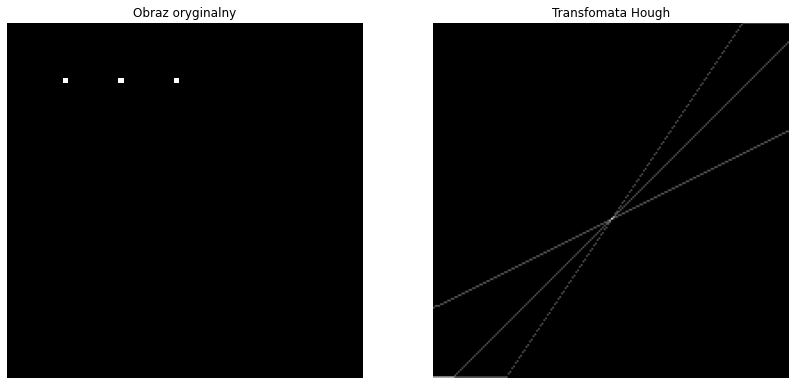

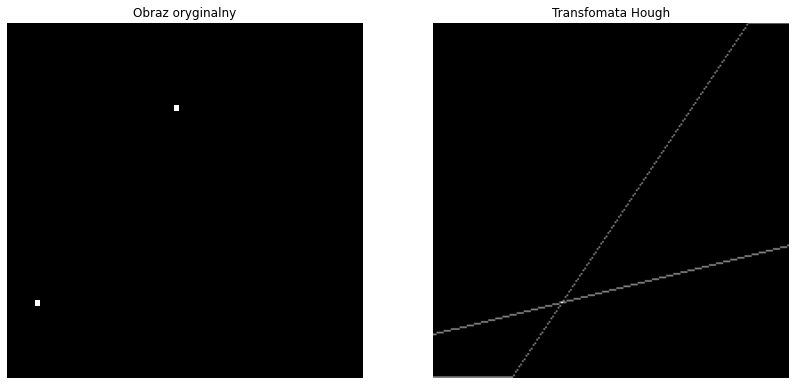

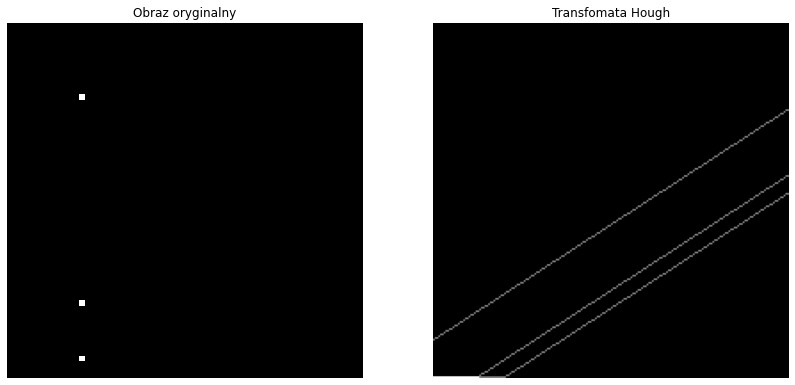

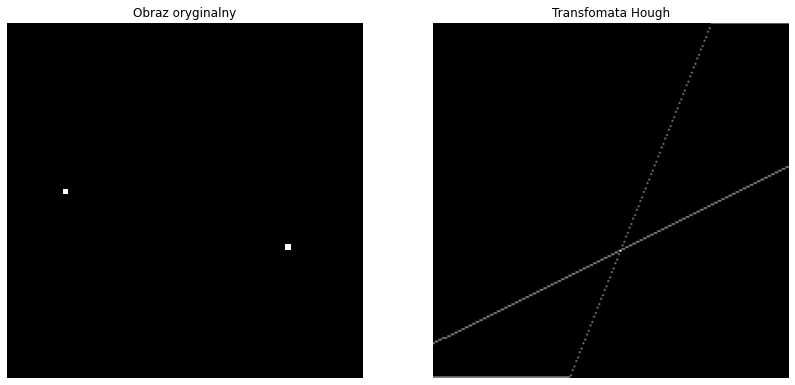

In [7]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.transform import hough_line, hough_line_peaks


def hough(img, aMin, aMax, aSkok, bMin, bMax, bSkok):
    X, Y = img.shape
    A = np.arange(aMin, aMax, aSkok)
    B = np.arange(bMin, bMax, bSkok)
    H = np.zeros((B.shape[0], A.shape[0]))

    for i in range(X):
        for j in range(Y):
            if img[i, j] == 1:
                for a_i in range(len(A)):
                    a = A[a_i]
                    b = i - a*j
                    b_i = np.argmin(abs(B - b))
                    H[b_i, a_i] +=  1

    fig, ax = plt.subplots(1, 2)
    fig.set_size_inches(14, 7)
    ax[0].imshow(img, cmap = 'gray')
    ax[0].set_title("Obraz oryginalny")
    ax[0].axis("off")

    ax[1].imshow(H, cmap = 'gray')
    ax[1].set_title('Transfomata Hough')
    ax[1].axis("off")
    
    plt.show()


coords = [[(10, 10), (10, 20), (10, 30)], [(15, 30), (50, 5)], [(13, 13), (50, 13), (60, 13)], [(30, 10), (40, 50)]]

for c in coords:
    img = np.zeros((64,64), dtype=np.uint8)
    for i, j in c:
        img[i, j] = 1
    hough(img, -5, 5, 0.05, -100, 100, 1)